


    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
def koch_snowflake(order, scale=10):
    
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3
            
            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)               # end points
            dp = p2 - p1                             # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

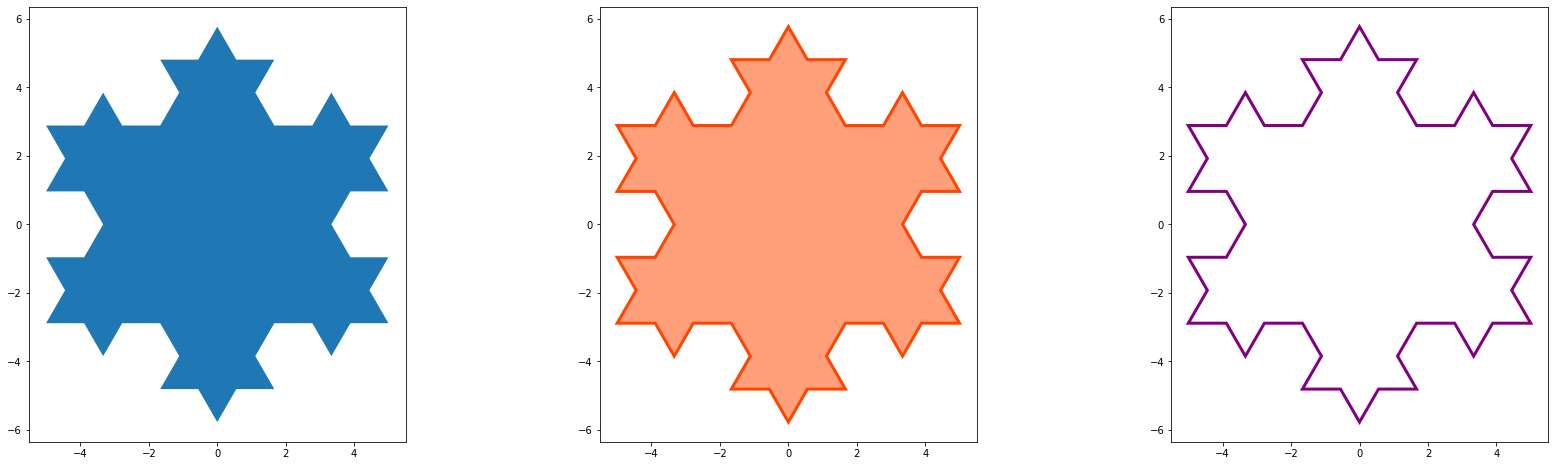

In [11]:
x, y = koch_snowflake(order=2)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(29, 8),subplot_kw={'aspect': 'equal'})
ax1.fill(x, y)
ax2.fill(x, y, facecolor='lightsalmon', edgecolor='orangered', linewidth=3)
ax3.fill(x, y, facecolor='none', edgecolor='purple', linewidth=3)
plt.show()

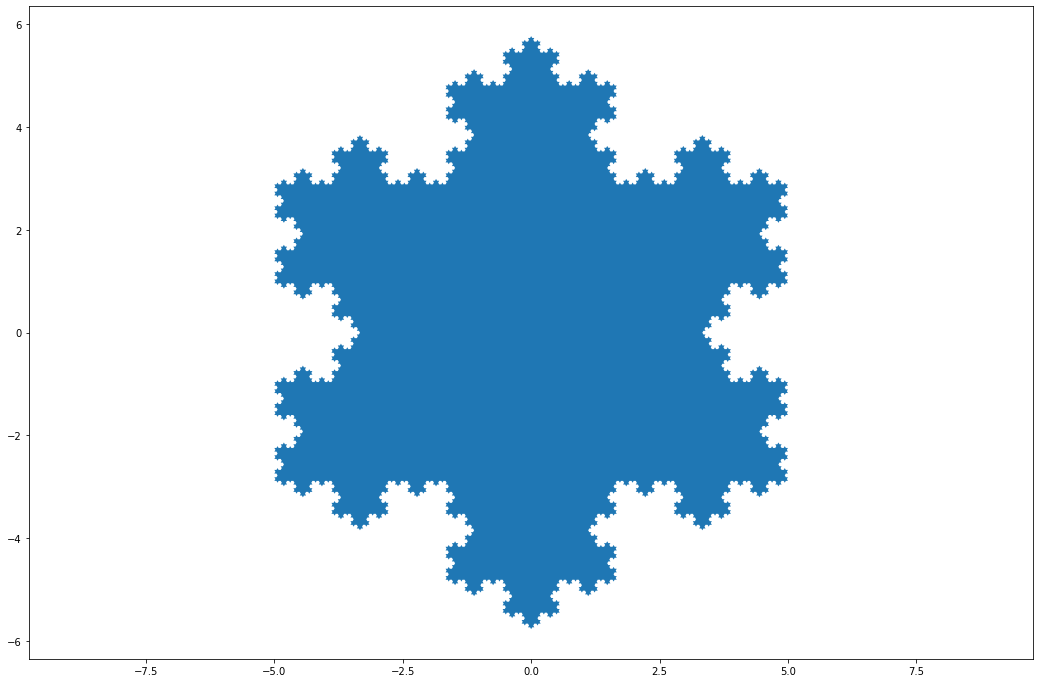

In [12]:
x, y = koch_snowflake(order=5)
plt.figure(figsize=(18, 12))
plt.axis('equal')
plt.fill(x, y)
plt.show()

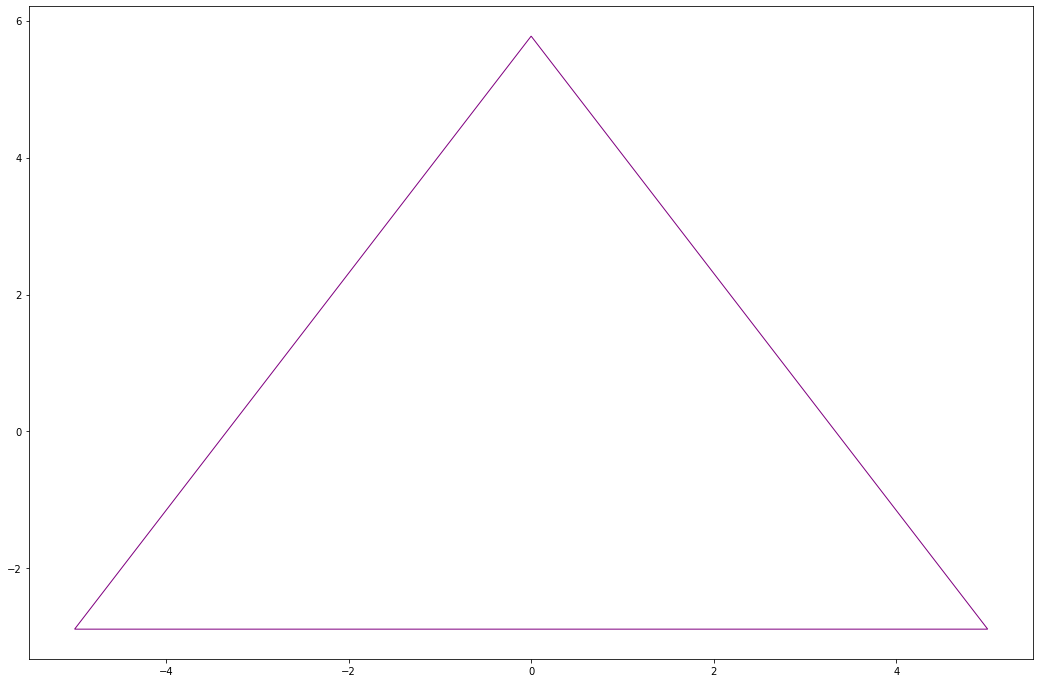

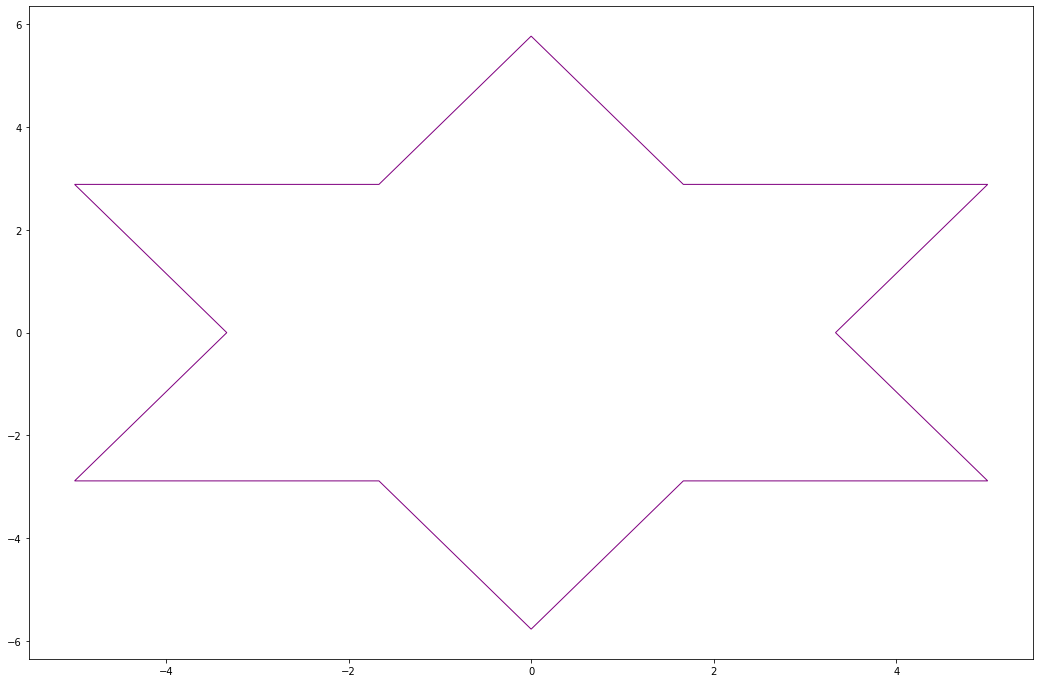

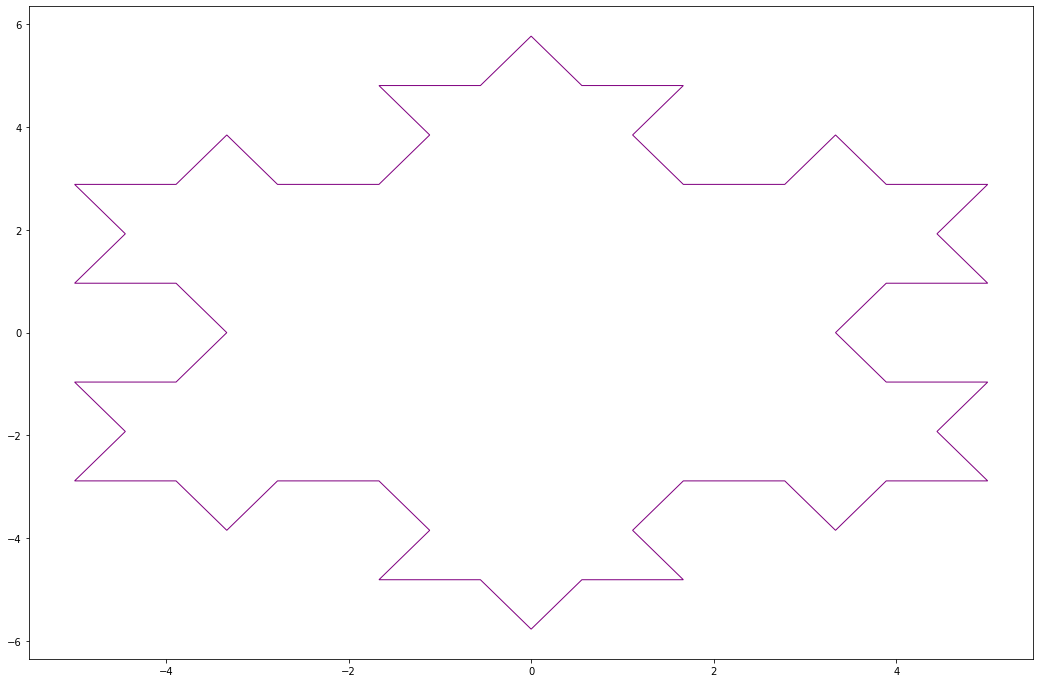

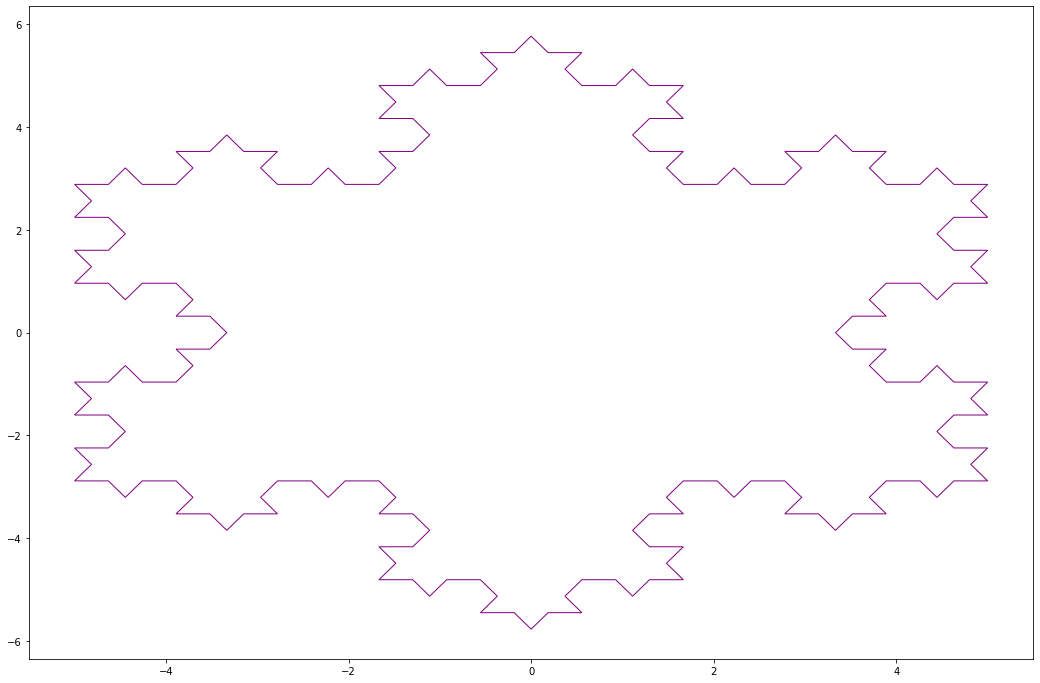

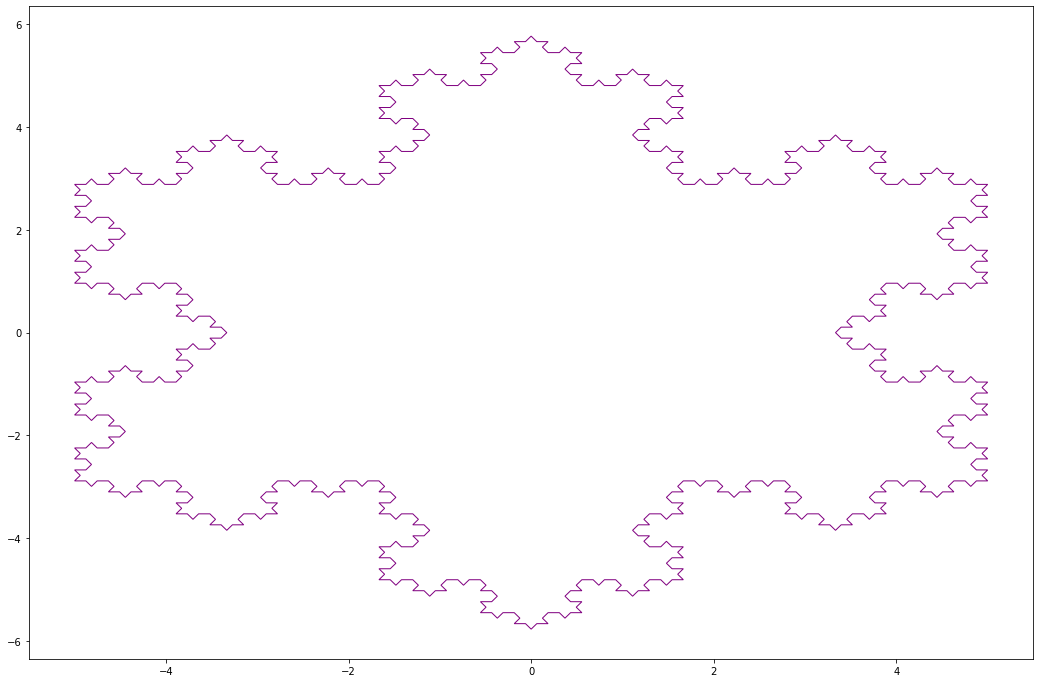

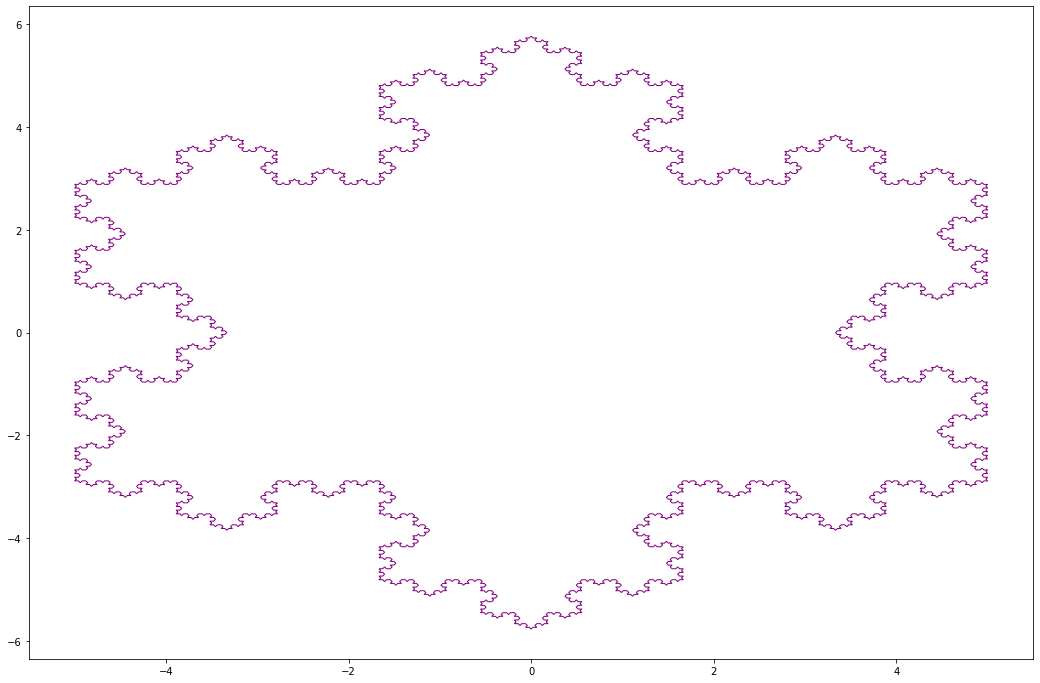

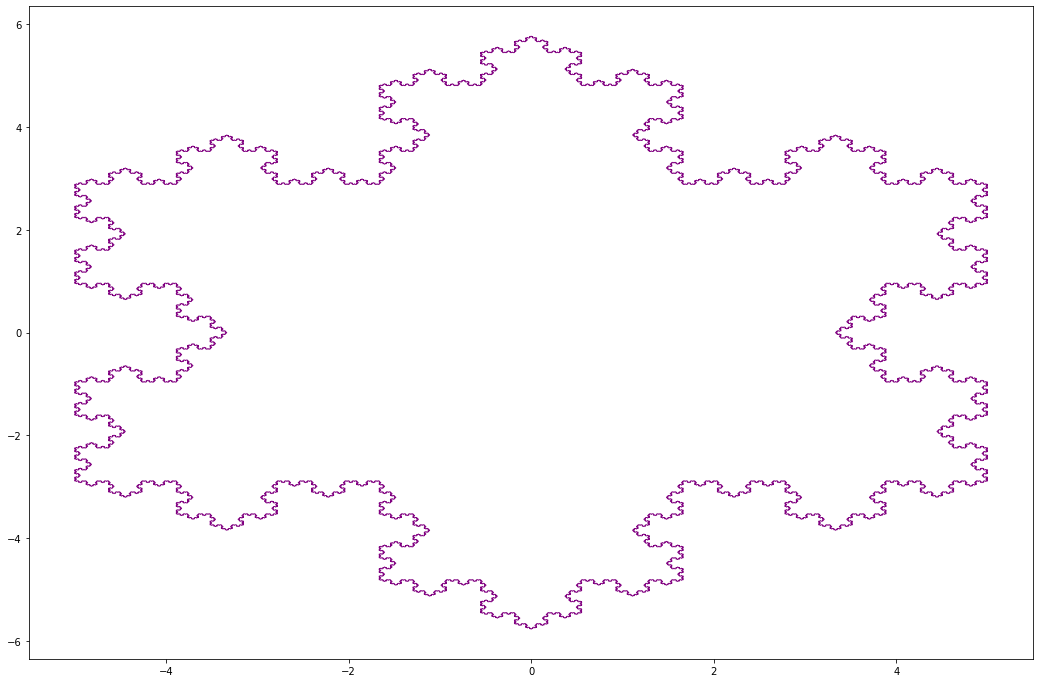

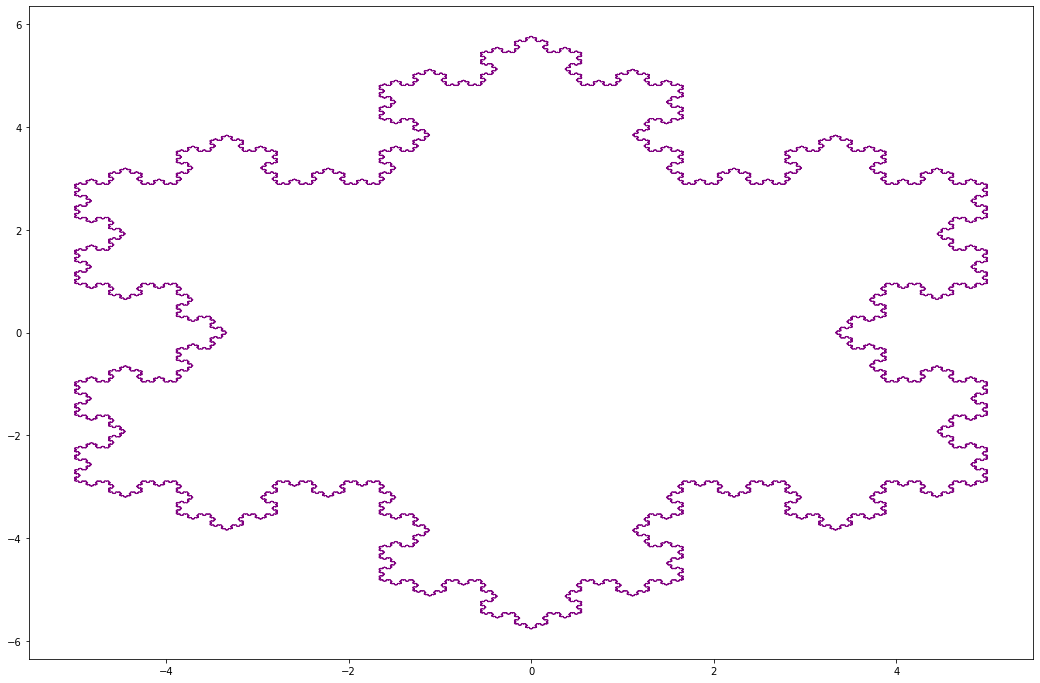

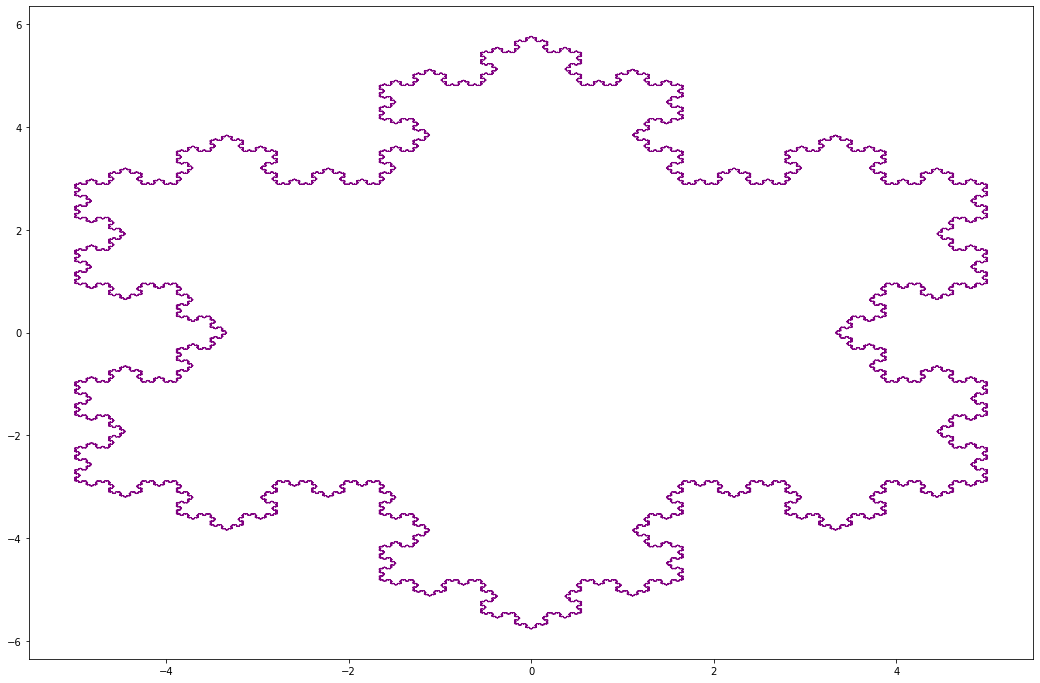

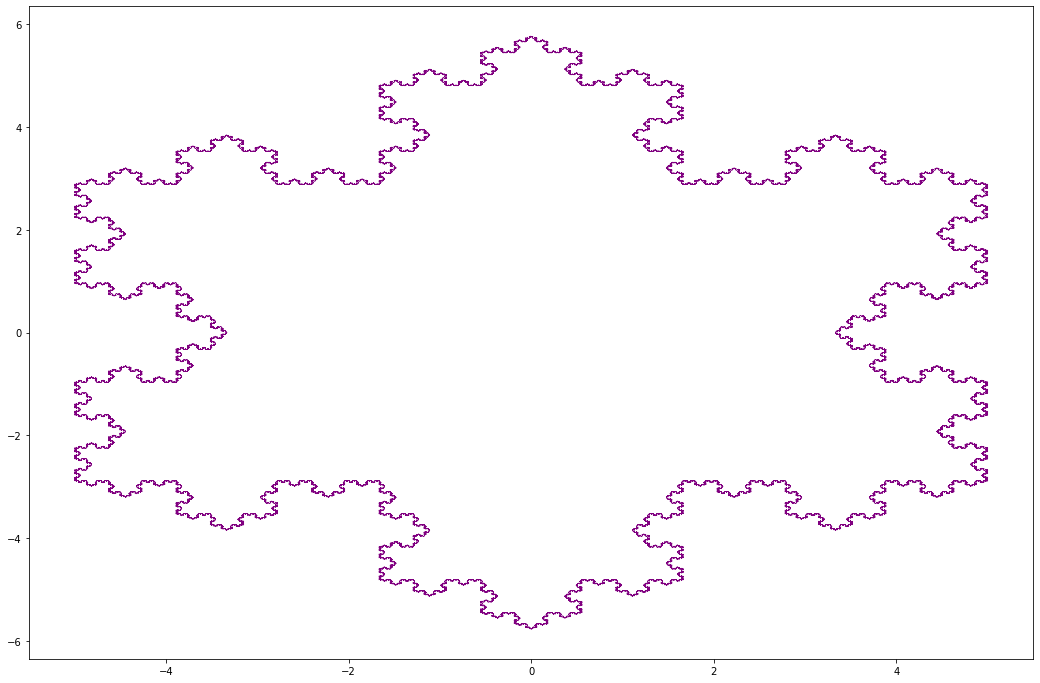

In [4]:
n=10
for i in range(10):
    x, y = koch_snowflake(order=i)
    plt.figure(figsize=(18, 12))
    #plt.axis('equal')
    #plt.fill(x, y)
    #plt.plot(x,y)
    plt.fill(x, y, facecolor='none', edgecolor='purple')
plt.show()